In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data

In [2]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

## Check for the null values

In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Observation:
* There are no null values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Observation:
* The features "Glucose," "Blood Pressure," "Skin Thickness," "Insulin," and "BMI" all have a minimum value of 0. This is illogical because these values cant be zero. Therefore, in our circumstance, this can be safely referred to as "missing data". The 0-valued rows must either be removed or replaced with the mean or median value for that feature.

# EDA
### Univariate analysis

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


0    500
1    268
Name: Outcome, dtype: int64

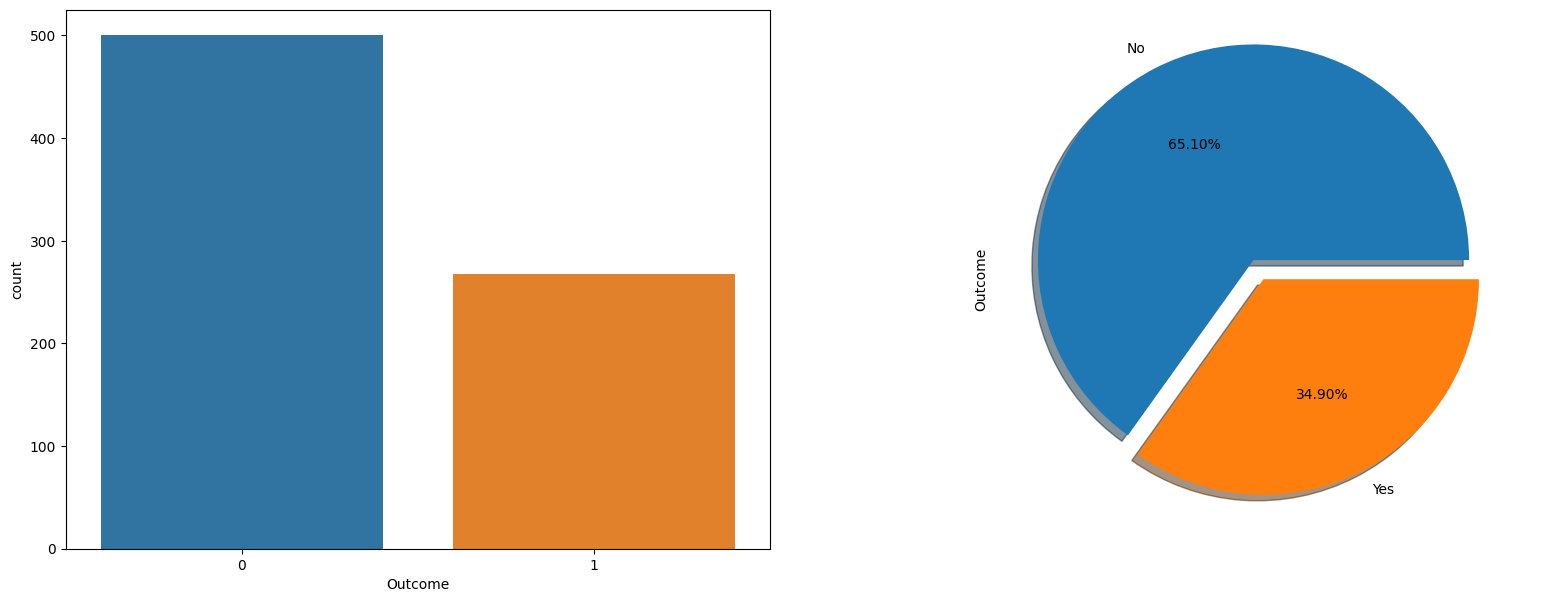

In [9]:
fig, ax = plt.subplots(1,2,figsize=(20,7))

sns.countplot(data=data, x='Outcome', ax=ax[0])
data['Outcome'].value_counts().plot.pie(explode=[0.1,0], autopct='%0.2f%%', labels=['No','Yes'], shadow=True, ax=ax[1])
data['Outcome'].value_counts()

### Observation:
* 0 = Non-Diabetic
* 1 = Diabetic

* Non-Diabetic patients (500) (65.10%)
* Diabetic patients (268) (34.90%)

<Axes: xlabel='Pregnancies'>

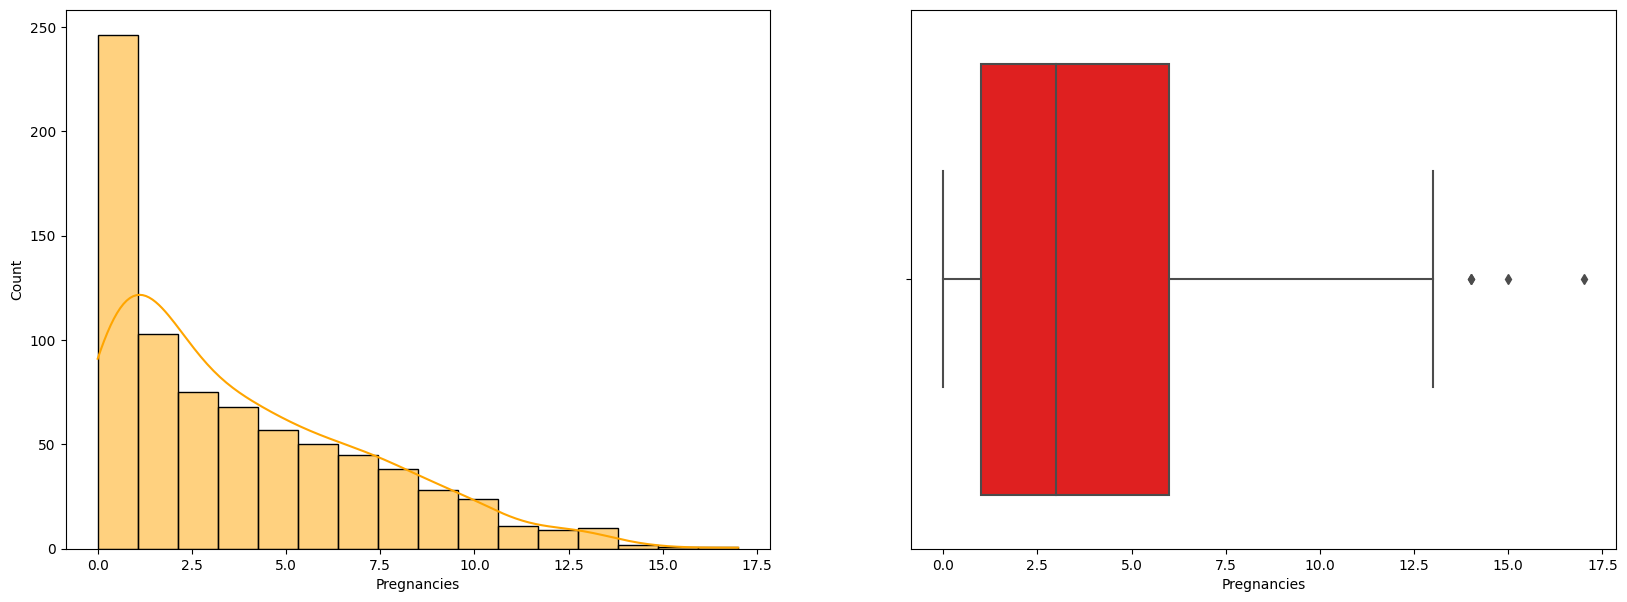

In [10]:
fig1, ax1 = plt.subplots(1,2,figsize=(20,7))

sns.histplot(data=data, x='Pregnancies',kde=True, ax=ax1[0], color='orange')
sns.boxplot(data=data, x='Pregnancies', ax=ax1[1], color='red')

In [11]:
print('Median of pregnancies :',data['Pregnancies'].median())
print('Maximum of pregnancies:', data['Pregnancies'].max())

Median of pregnancies : 3.0
Maximum of pregnancies: 17


In [12]:
data['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

### Observation:
* Most patients had 0, 1 or 2 pregnancies.
* Median value Of Pregnancies is 3.
* Also, patients had upto 17 pregnancies!

<Axes: xlabel='Glucose'>

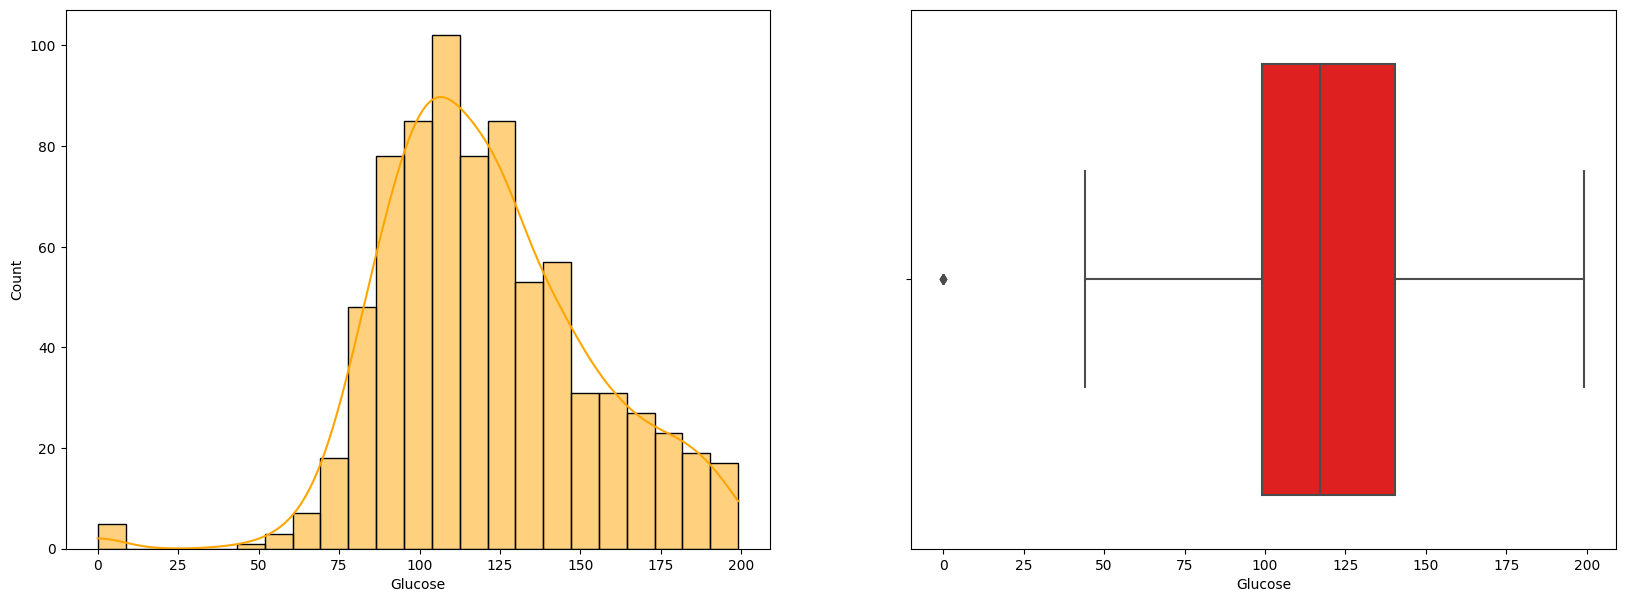

In [13]:
fig1, ax1 = plt.subplots(1,2,figsize=(20,7))

sns.histplot(data=data, x='Glucose',kde=True, ax=ax1[0], color='orange')
sns.boxplot(data=data, x='Glucose', ax=ax1[1], color='red')

In [14]:
print('Median of Glucose: ',data['Glucose'].median())
print('Maximum of Glucose: ', data['Glucose'].max())
print('Mean of Glucose: ',data['Glucose'].mean())

Median of Glucose:  117.0
Maximum of Glucose:  199
Mean of Glucose:  120.89453125


In [15]:
print('Rows with Glucose value of 0: ',data[data['Glucose']==0].shape[0])

Rows with Glucose value of 0:  5


### Observation:
* Median (117.0) and mean (120.8) of Glucose lie very close to each other i.e. the distribution is more or less symmetric and uniform.
* As seen from the box plot, an outlier lies on 0-value.
* There are 5 rows with Glucose value as 0. This is not logical.

<Axes: xlabel='BloodPressure'>

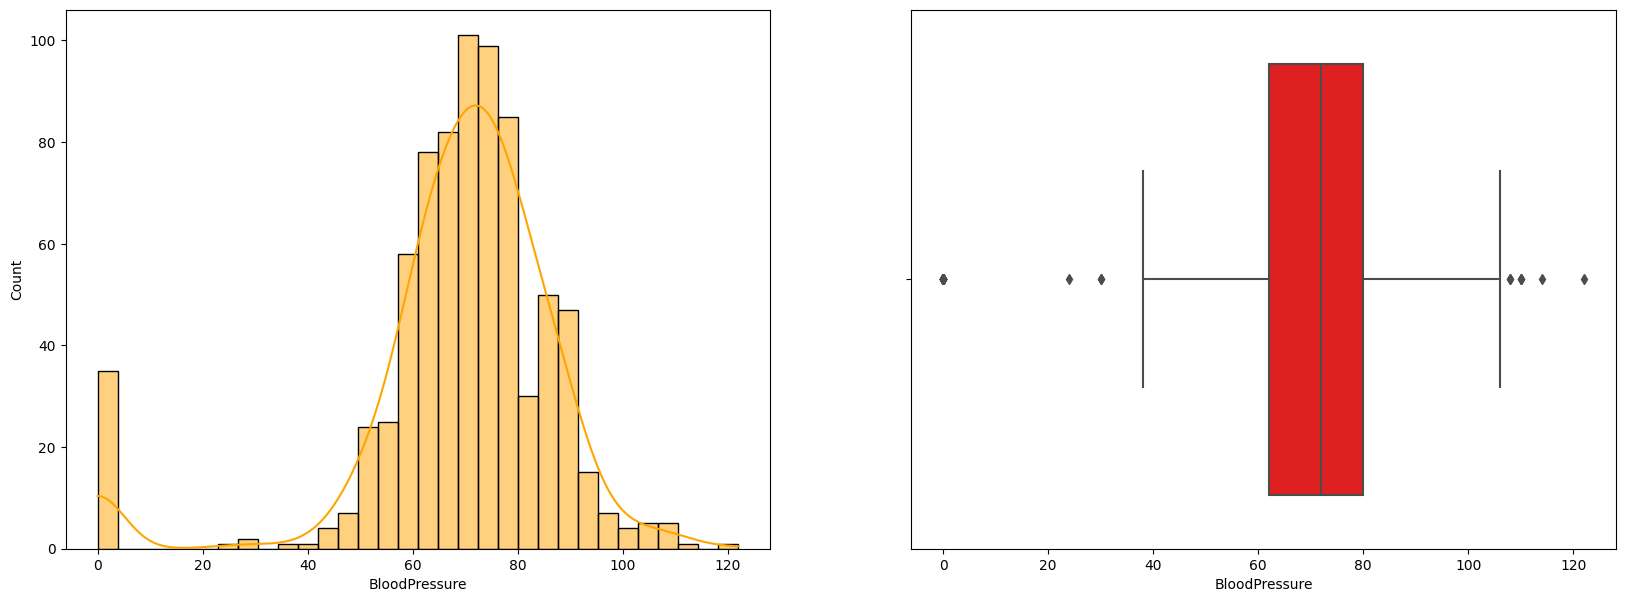

In [16]:
fig1, ax1 = plt.subplots(1,2,figsize=(20,7))

sns.histplot(data=data, x='BloodPressure',kde=True, ax=ax1[0], color='orange')
sns.boxplot(data=data, x='BloodPressure', ax=ax1[1], color='red')

In [17]:
print('Median of BloodPressure: ',data['BloodPressure'].median())
print('Maximum of BloodPressure: ', data['BloodPressure'].max())
print('Mean of BloodPressure: ',data['BloodPressure'].mean())

Median of BloodPressure:  72.0
Maximum of BloodPressure:  122
Mean of BloodPressure:  69.10546875


In [18]:
print('Rows with BloodPressure value of 0: ',data[data['BloodPressure']==0].shape[0])

Rows with BloodPressure value of 0:  35


### Observation:
* Median (72.0) and mean (69.1) of BloodPressure lie very close to each other i.e. the distribution is more or less symmetric and uniform.
* As seen from the box plot, an outlier lies on 0-value.
* There are 35 rows with BloodPressure value as 0. This is not logical.  

<Axes: xlabel='Insulin'>

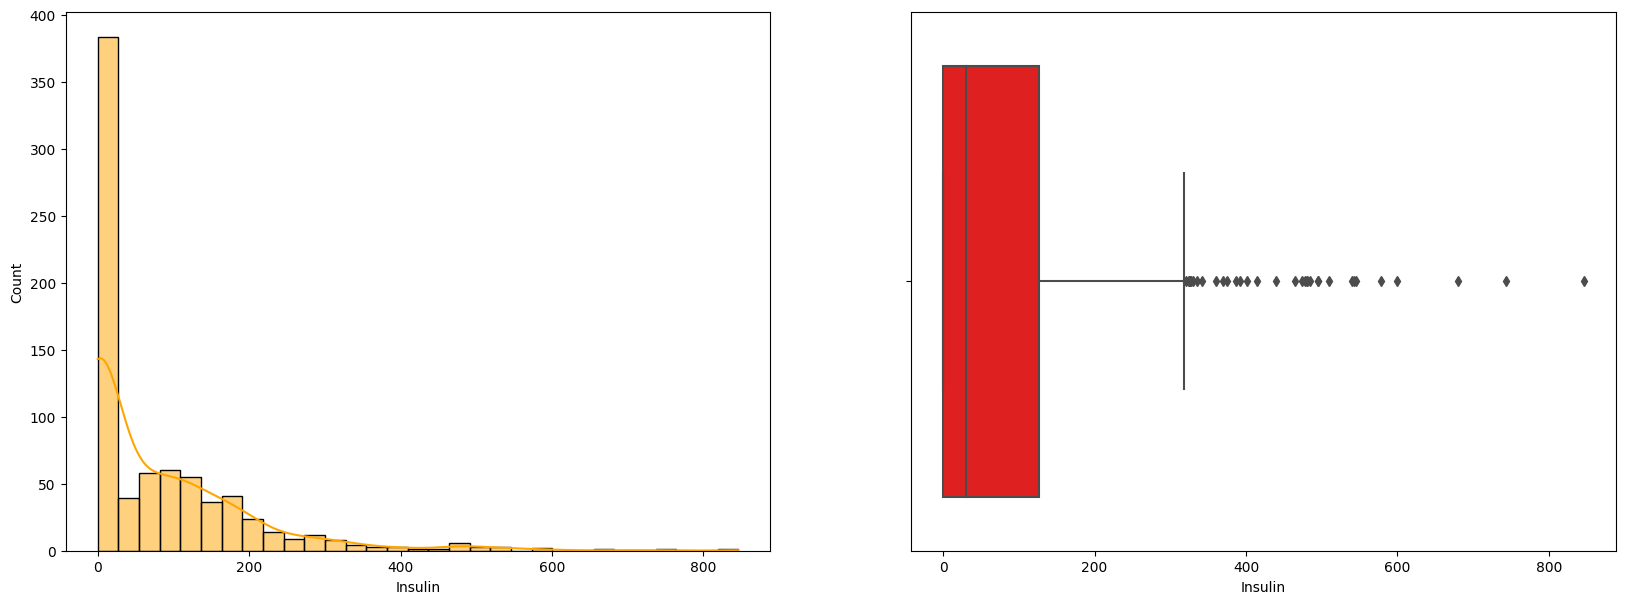

In [19]:
fig1, ax1 = plt.subplots(1,2,figsize=(20,7))

sns.histplot(data=data, x='Insulin',kde=True, ax=ax1[0], color='orange')
sns.boxplot(data=data, x='Insulin', ax=ax1[1], color='red')

In [20]:
print('Rows with Insulin value of 0: ',data[data['Insulin']==0].shape[0])

Rows with Insulin value of 0:  374


### Observation:
* The plots for Insulin are highly skewed. Also, the 0-value logical error is the most for this feature.
* 374 out of 768 instances have value of Insulin as 0.

<Axes: xlabel='BMI'>

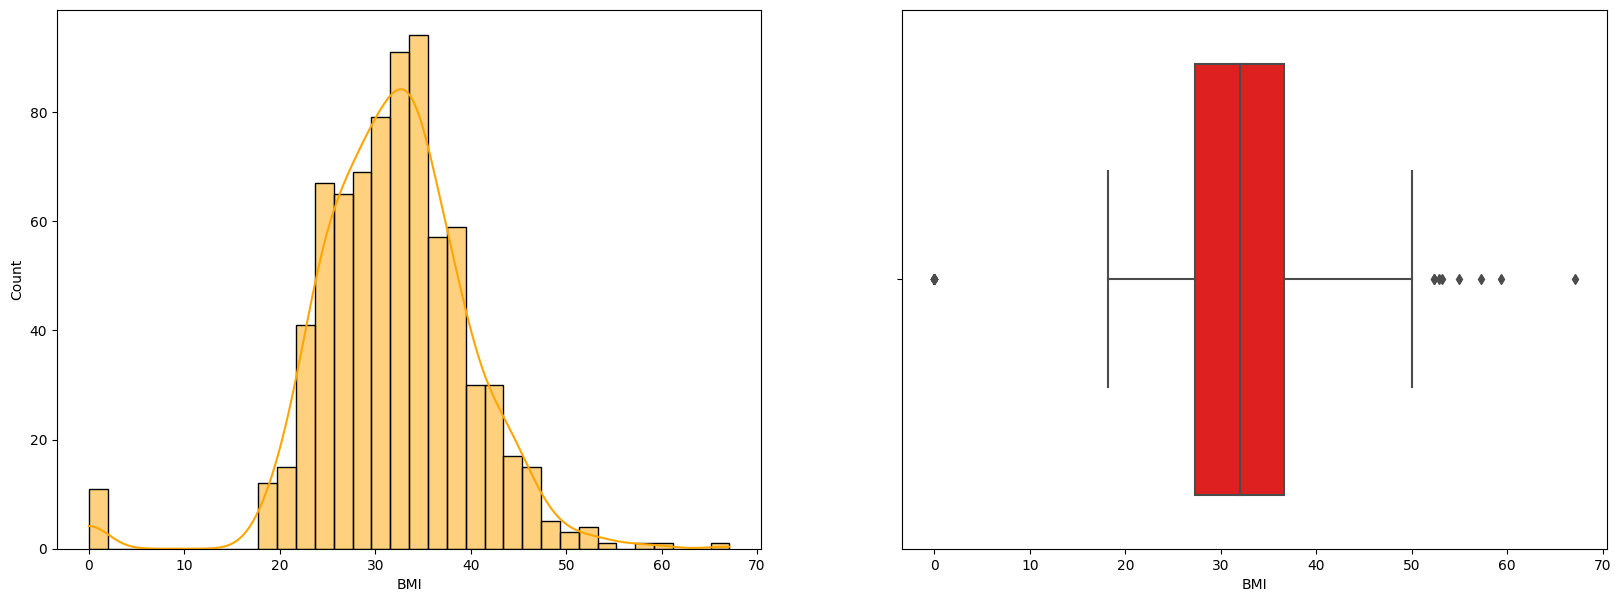

In [21]:
fig1, ax1 = plt.subplots(1,2,figsize=(20,7))

sns.histplot(data=data, x='BMI',kde=True, ax=ax1[0], color='orange')
sns.boxplot(data=data, x='BMI', ax=ax1[1], color='red')

In [22]:
print('Median of BMI: ',data['BMI'].median())
print('Maximum of BMI: ', data['BMI'].max())
print('Mean of BMI: ',data['BMI'].mean())

Median of BMI:  32.0
Maximum of BMI:  67.1
Mean of BMI:  31.992578124999998


In [23]:
print('Rows with BMI value of 0: ',data[data['BMI']==0].shape[0])

Rows with BMI value of 0:  11


### Observation:
* Median (32.0) and Mean (31.9) of BMI are very close to each other. Thus, the distribution is more or less symmetric and uniform
* Maximum BMI is 67.1
* There are 11 rows with BMI value as 0

<Axes: xlabel='DiabetesPedigreeFunction'>

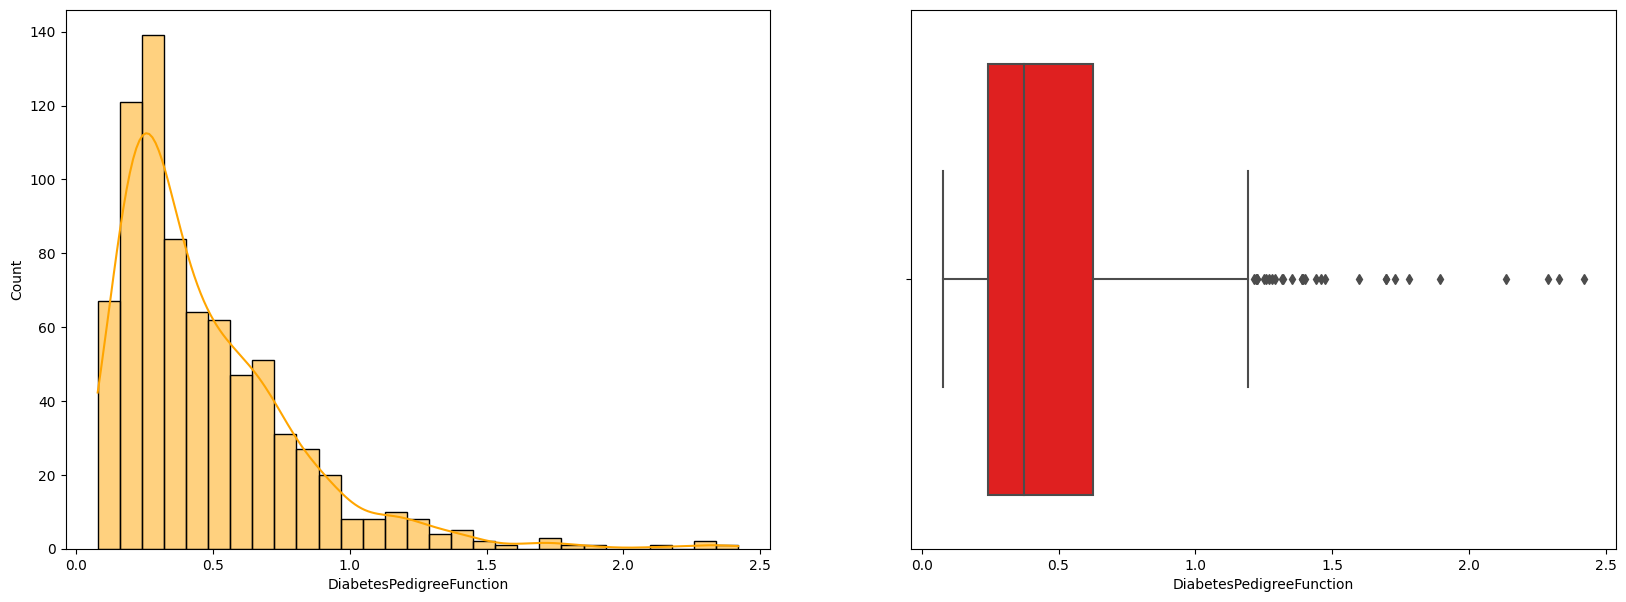

In [24]:
fig1, ax1 = plt.subplots(1,2,figsize=(20,7))

sns.histplot(data=data, x='DiabetesPedigreeFunction',kde=True, ax=ax1[0], color='orange')
sns.boxplot(data=data, x='DiabetesPedigreeFunction', ax=ax1[1], color='red')

In [25]:
print('Median of DiabetesPedigreeFunction: ',data['DiabetesPedigreeFunction'].median())
print('Maximum of DiabetesPedigreeFunction: ', data['DiabetesPedigreeFunction'].max())
print('Mean of DiabetesPedigreeFunction: ',data['DiabetesPedigreeFunction'].mean())

Median of DiabetesPedigreeFunction:  0.3725
Maximum of DiabetesPedigreeFunction:  2.42
Mean of DiabetesPedigreeFunction:  0.47187630208333325


### Observation:
* The histogram is higly skewed on the left side.
* There are many outliers in the Box plot.

<Axes: xlabel='Age'>

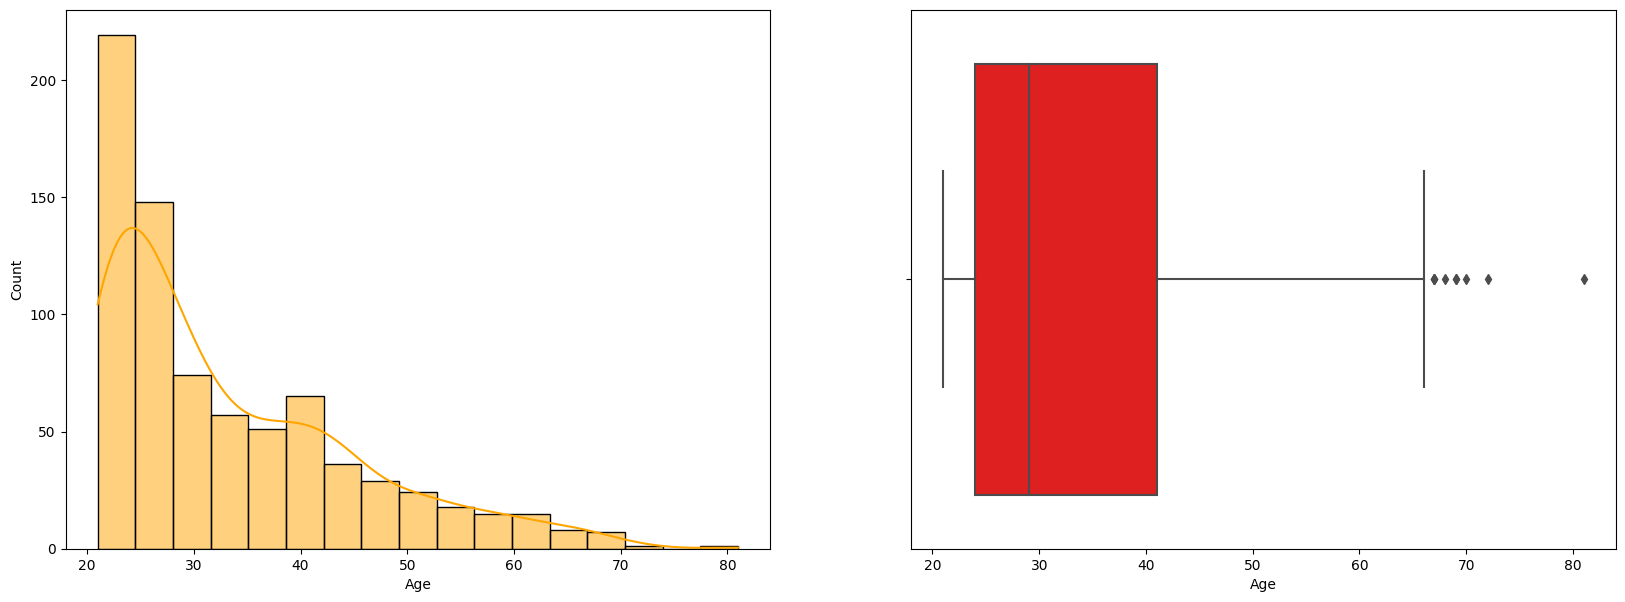

In [26]:
fig1, ax1 = plt.subplots(1,2,figsize=(20,7))

sns.histplot(data=data, x='Age',kde=True, ax=ax1[0], color='orange')
sns.boxplot(data=data, x='Age', ax=ax1[1], color='red')

In [27]:
print('Median of Age: ',data['Age'].median())
print('Maximum of Age: ', data['Age'].max())
print('Mean of Age: ',data['Age'].mean())

Median of Age:  29.0
Maximum of Age:  81
Mean of Age:  33.240885416666664


### Observation:
* The distribution of Age is skewed on the left side.
* There are some outliers in the Box plot for Age.

### Bi-variate analysis

<Axes: xlabel='Glucose', ylabel='Count'>

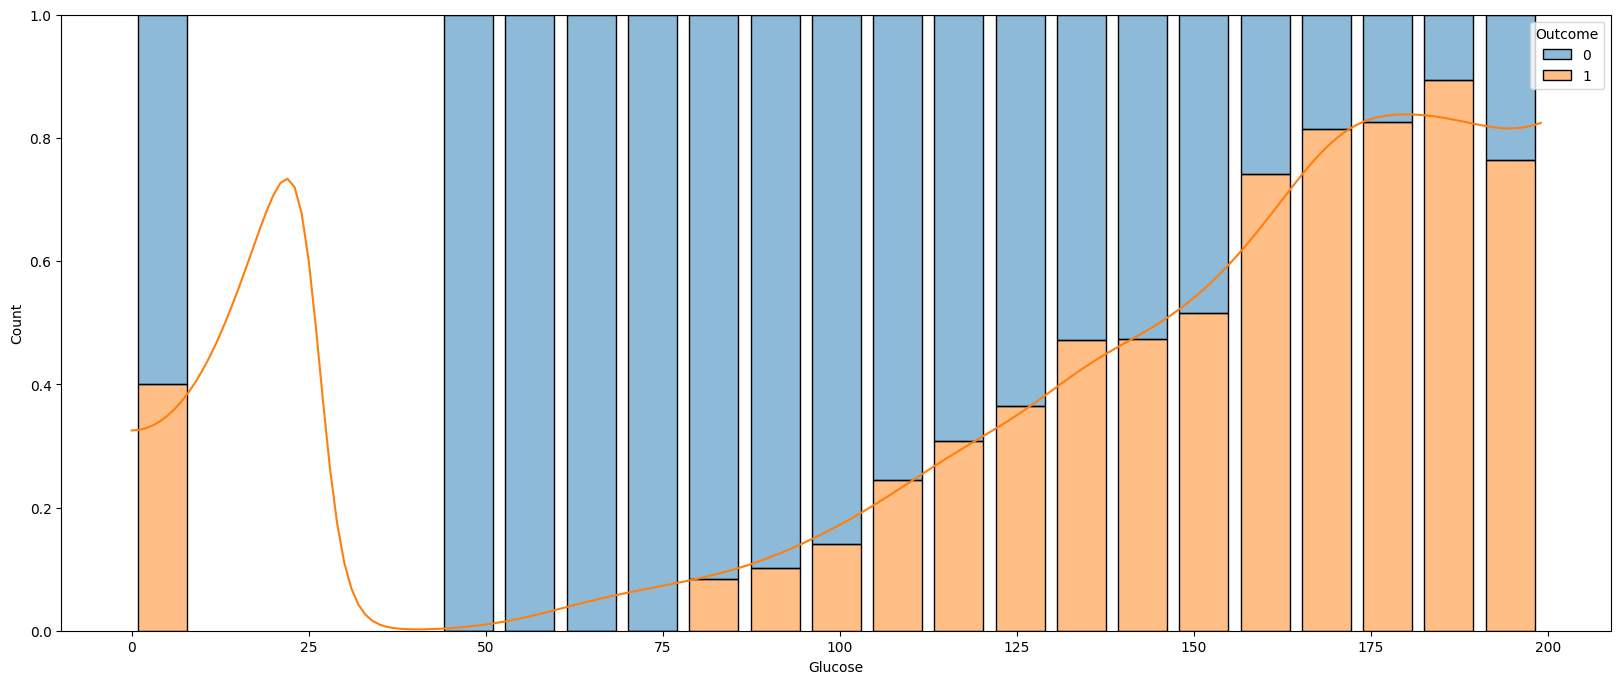

In [28]:
fig, ax = plt.subplots(figsize=(20,8))

sns.histplot(data=data, x='Glucose', hue='Outcome', shrink=0.8, multiple='fill',kde=True)

### Observation:
### We see a positive linear correlation
============================================
* As the value of Glucose increases, the count of patients having diabetes increases i.e. value of Outcome as 1, increases.
* Also, after the Glucose value of 125, there is a steady increase in the number of patients having Outcome of 1.
* Note, when Glucose value is 0, it means the measurement is missing. We need to fill that values with the mean or median.
* So there is a significant amount of positive linear correlation.

<Axes: xlabel='BloodPressure', ylabel='Count'>

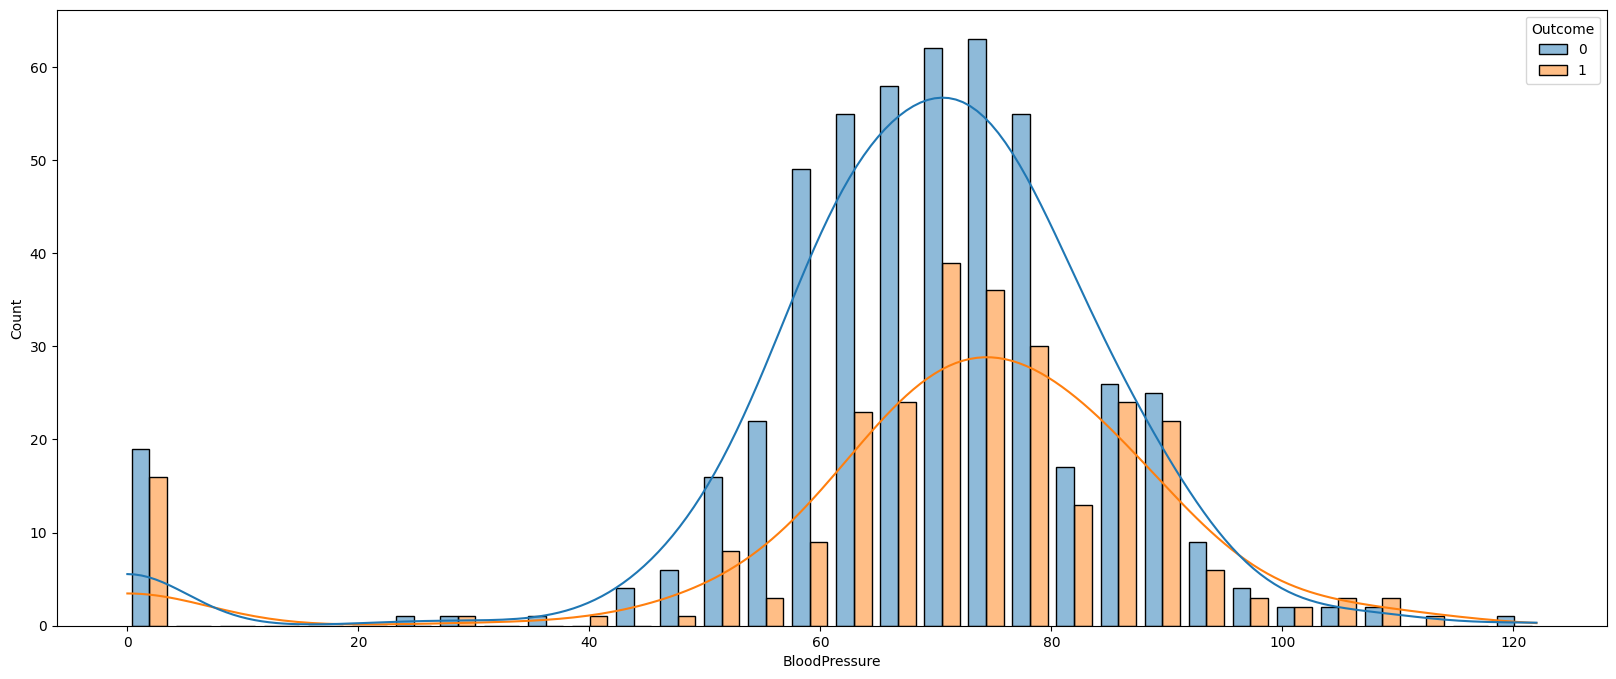

In [29]:
fig, ax = plt.subplots(figsize=(20,8))

sns.histplot(data=data, x='BloodPressure', hue='Outcome', shrink=0.8, multiple='dodge',kde=True)

### Observation:
We observe that, Outcome and BloodPressure do NOT have a positive or negative linear correlation. The value of Outcome do not increase
linearly as value of BloodPressure increases.
However, for BloodPressure values greater than 82, count of patients with Outcome as 1, is more.

<Axes: xlabel='BMI', ylabel='Count'>

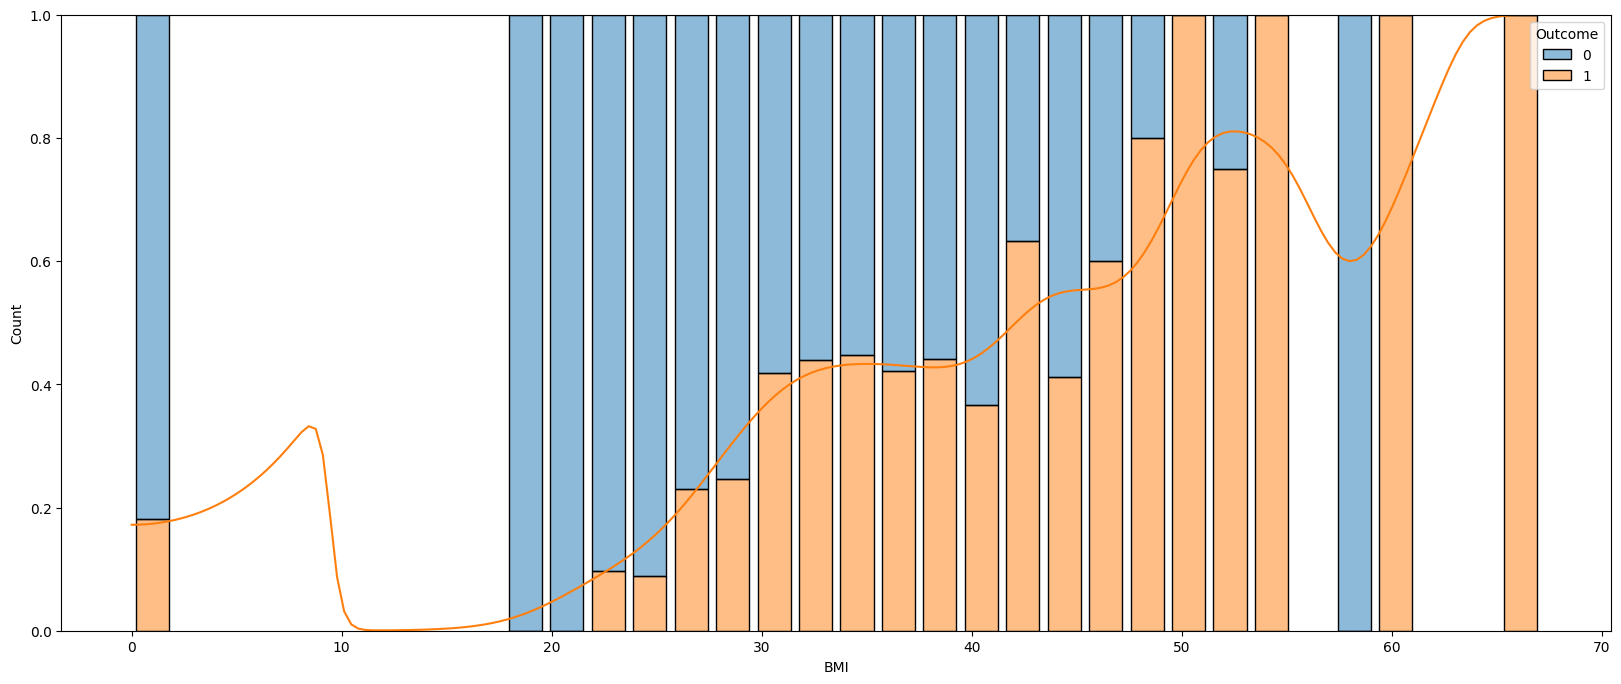

In [30]:
fig, ax = plt.subplots(figsize=(20,8))

sns.histplot(data=data, x='BMI', hue='Outcome', shrink=0.8, multiple='fill',kde=True)

### Observation:
### We see a positive linear correlation
============================================

<Axes: xlabel='Age', ylabel='Count'>

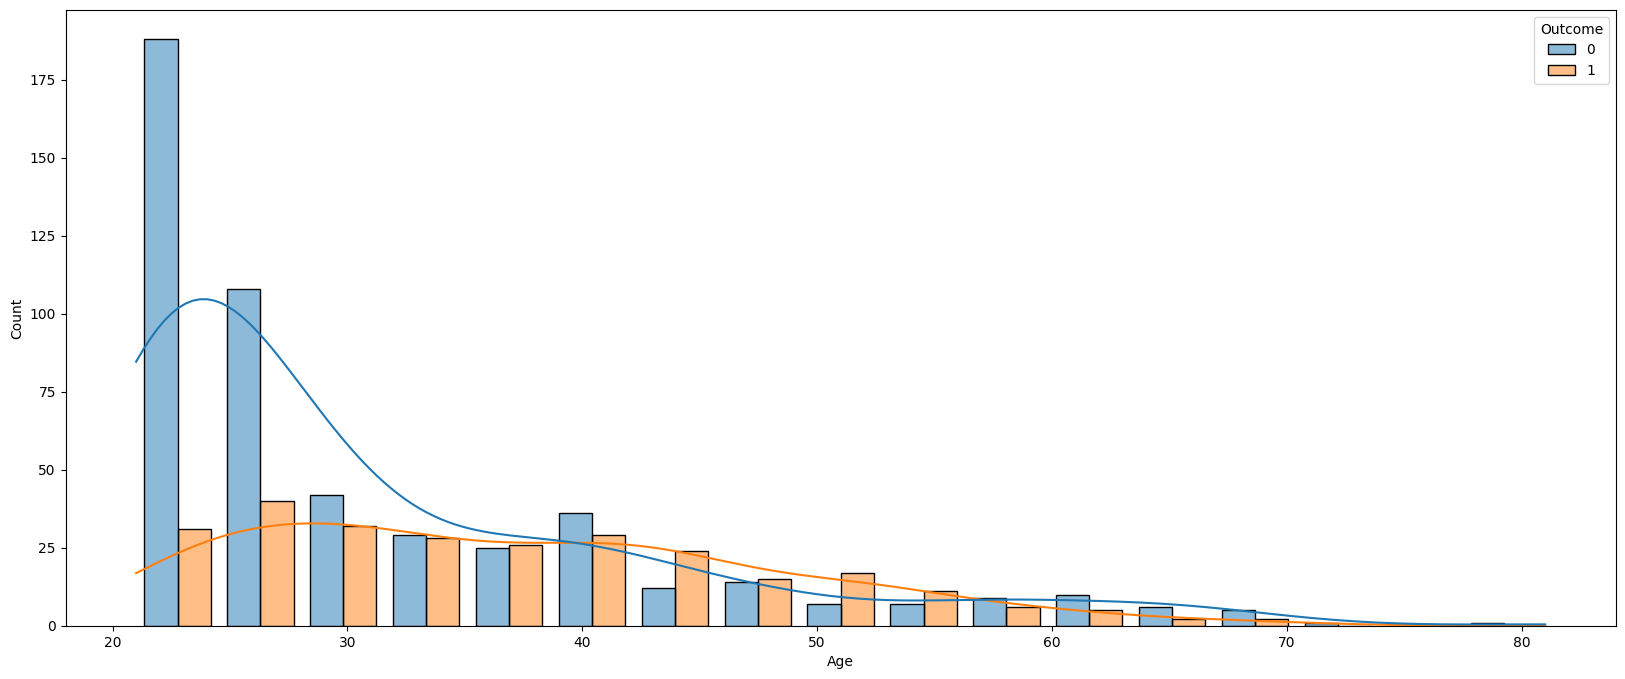

In [31]:
fig, ax = plt.subplots(figsize=(20,8))

sns.histplot(data=data, x='Age', hue='Outcome', shrink=0.8, multiple='dodge',kde=True)

### Observation:
### We see a positive linear correlation
============================================

<Axes: xlabel='Pregnancies', ylabel='Count'>

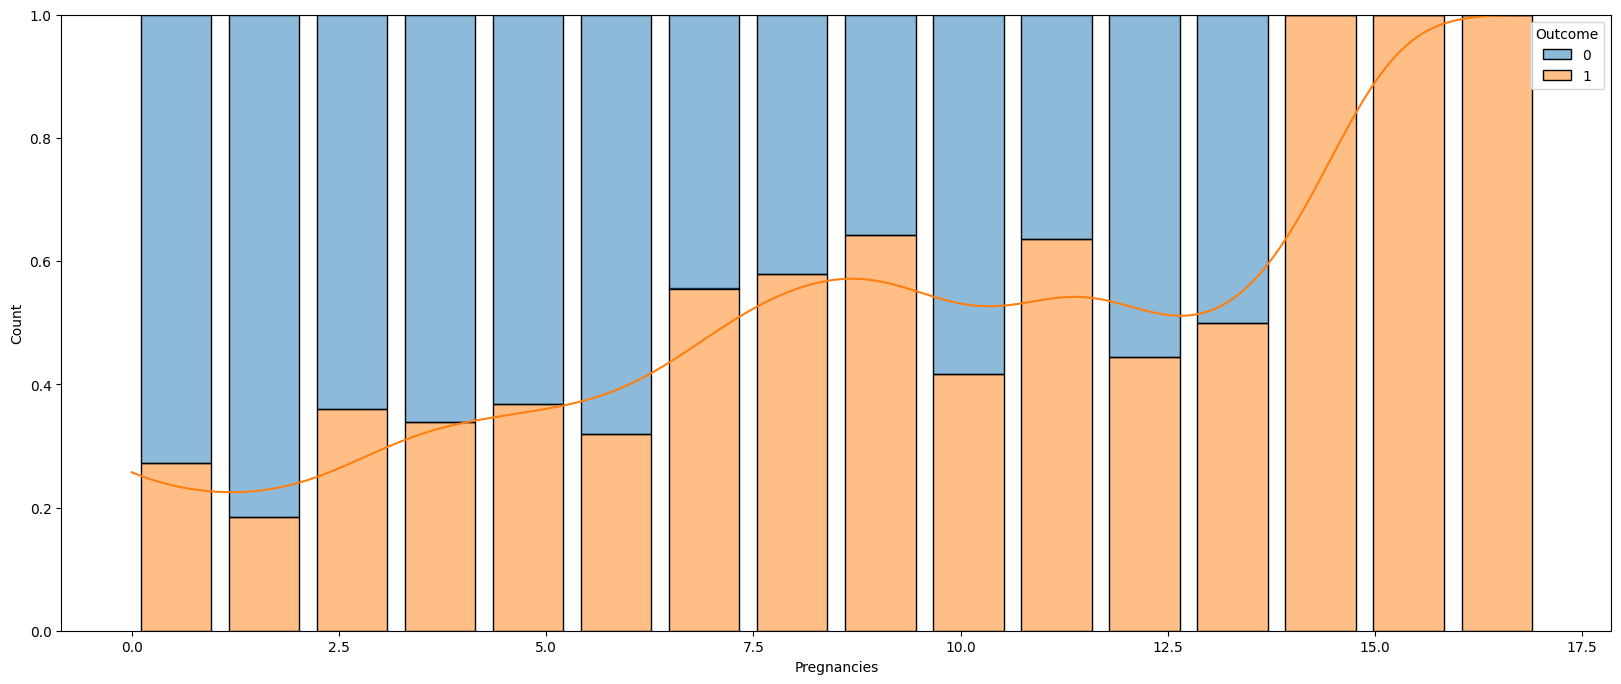

In [32]:
fig, ax = plt.subplots(figsize=(20,8))

sns.histplot(data=data, x='Pregnancies', hue='Outcome', shrink=0.8, multiple='fill',kde=True)

### Observation:
### We see a positive linear correlation
============================================

<Axes: xlabel='SkinThickness', ylabel='Count'>

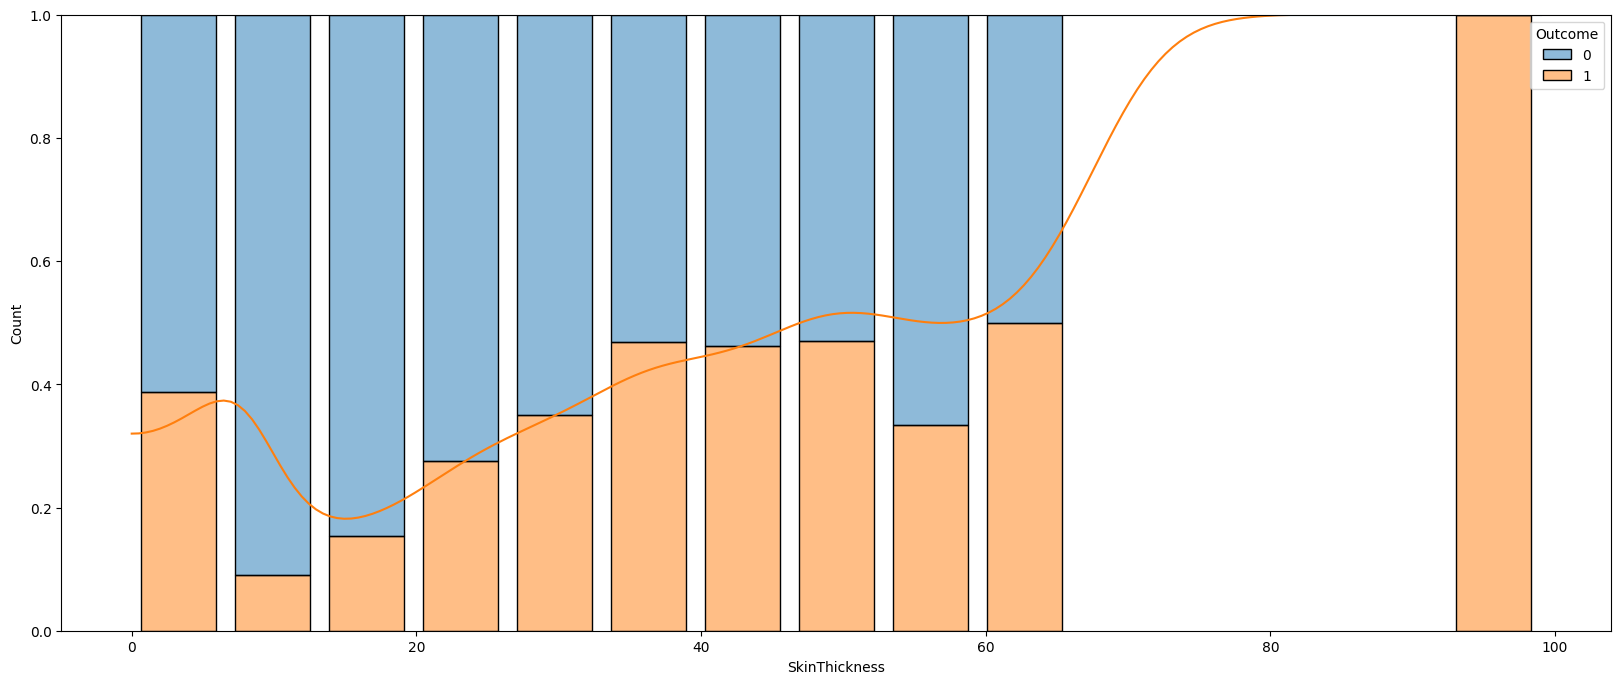

In [33]:
fig, ax = plt.subplots(figsize=(20,8))

sns.histplot(data=data, x='SkinThickness', hue='Outcome', shrink=0.8, multiple='fill',kde=True)

### Observation:
### We see a positive linear correlation
============================================

In [34]:
corr = data.corr()

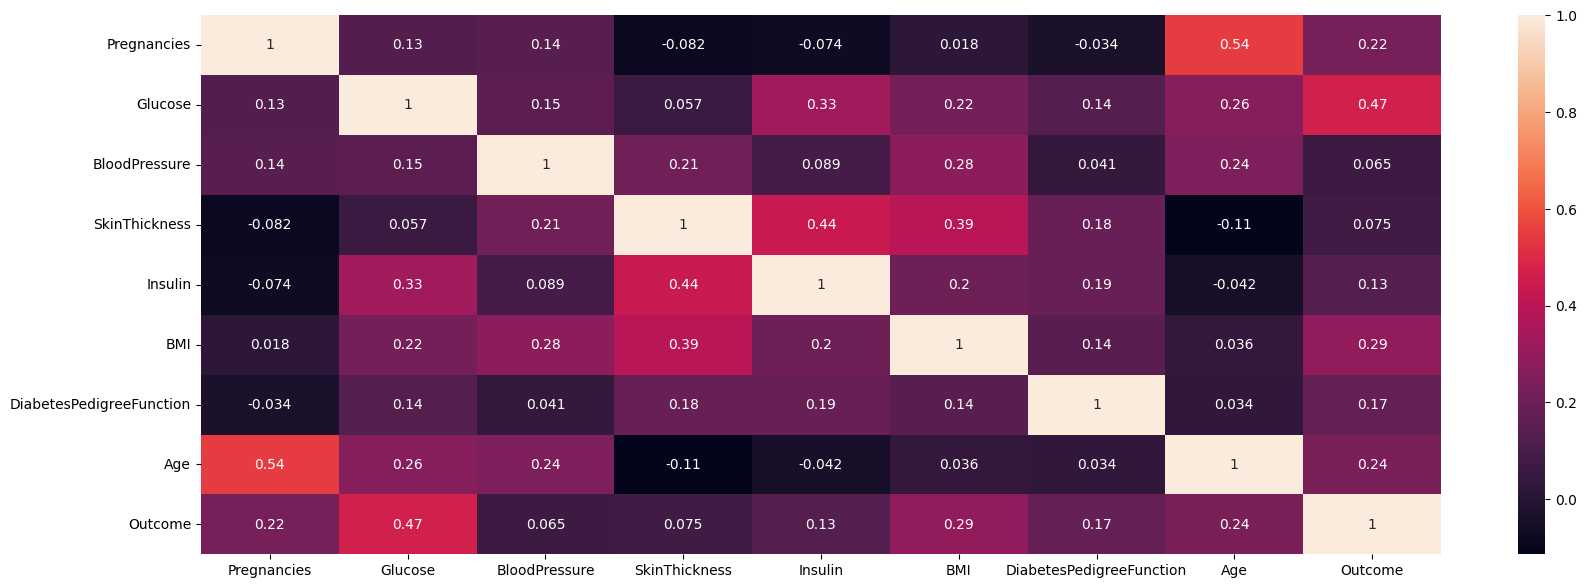

In [35]:
fig =  plt.subplots(figsize=(20,7))
dataplot = sns.heatmap(data=corr, annot=True)
plt.show( )

In [36]:
corr['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

### Observation:
* Glucose has the maximum positive linear correlation with Outcome.
* BloodPressure has the lowest positive linear correlation with Outcome.
* No feature has a negative linear correlation with Outcome.

In [37]:
data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

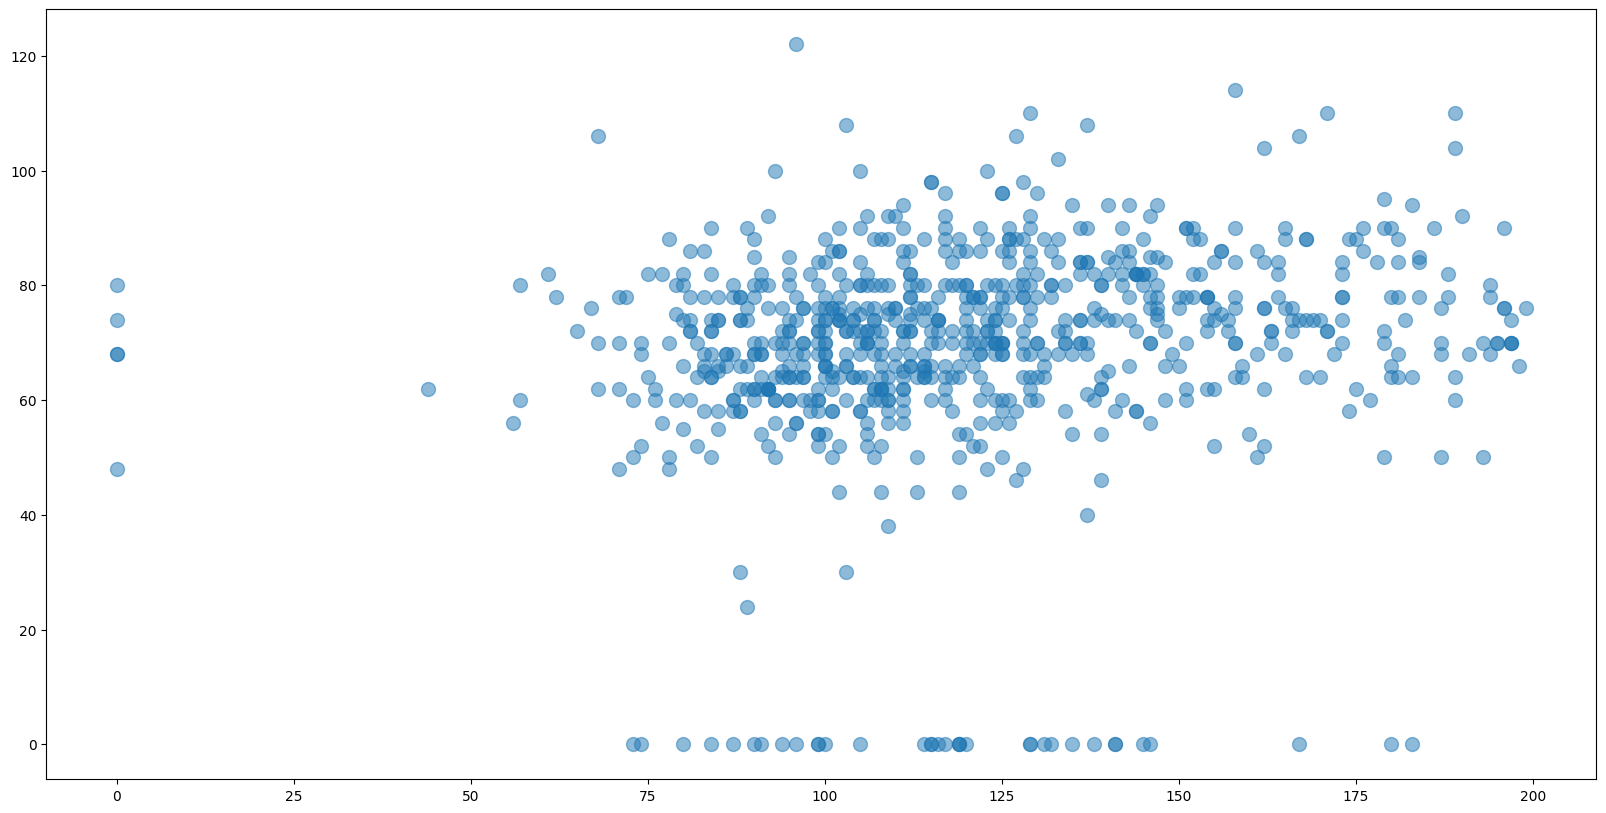

In [38]:
x = data['Glucose']
y = data['BloodPressure']

plt.figure(figsize=(20,10))
plt.scatter(x,y,s=100,alpha=0.5)

In [39]:
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [40]:
val_0 = ['Glucose','BloodPressure','SkinThickness','BMI']

for i in val_0:
    print(f'Rows with 0 values in {i}: ',data[data[i]==0].shape[0])

Rows with 0 values in Glucose:  5
Rows with 0 values in BloodPressure:  35
Rows with 0 values in SkinThickness:  227
Rows with 0 values in BMI:  11


## Multi-variate analysis

In [41]:
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


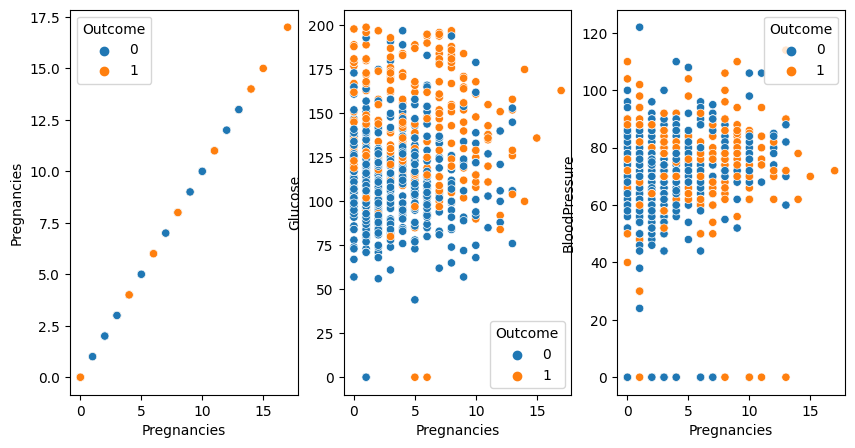

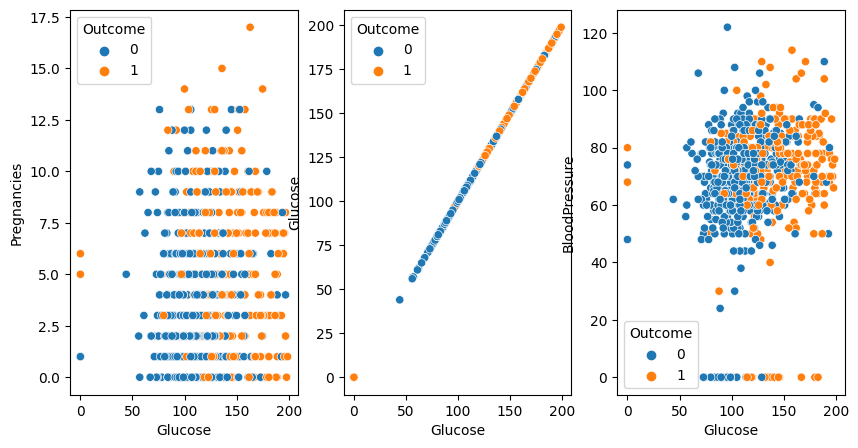

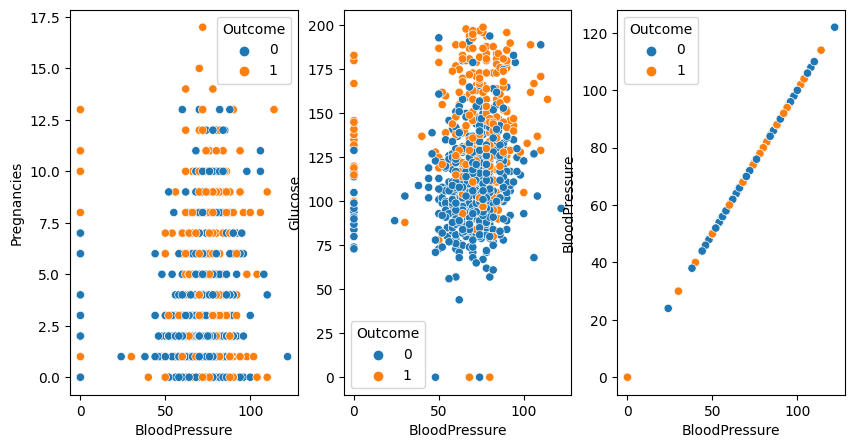

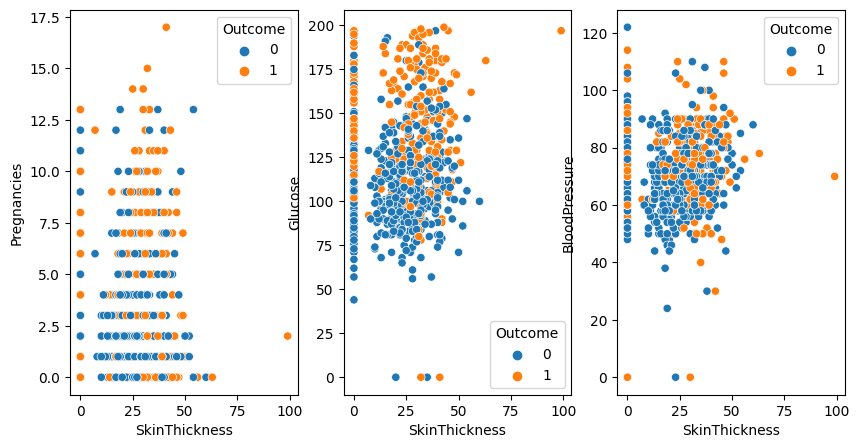

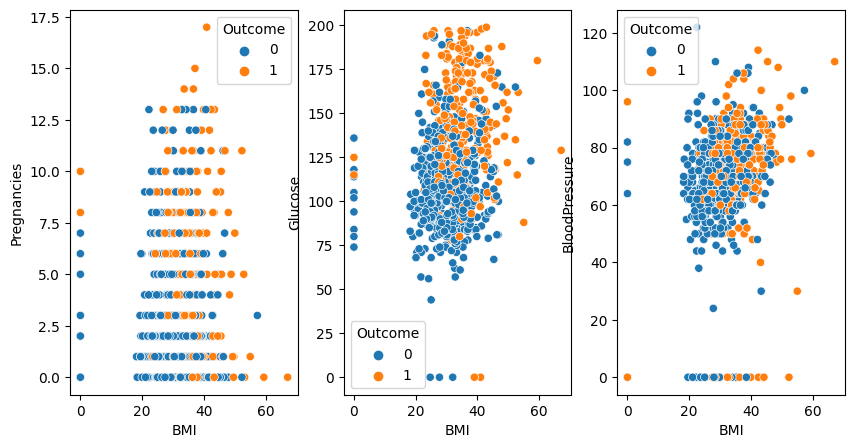

In [42]:
mul_var = ['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI']

for i in mul_var:
    fig, ax = plt.subplots(1,3,figsize=(10,5))
    sns.scatterplot(data=data, x=i, y='Pregnancies', hue='Outcome',ax=ax[0])
    sns.scatterplot(data=data, x=i, y='Glucose', hue='Outcome',ax=ax[1])
    sns.scatterplot(data=data, x=i, y='BloodPressure', hue='Outcome',ax=ax[2])    
    plt.show()

In [43]:
# sns.pairplot(data=data, hue='Outcome')
# plt.show()

In [44]:
val_0 = ['Glucose','BloodPressure','SkinThickness','BMI']

for i in val_0:
    print(f'Rows with 0 values in {i}: ',data[data[i]==0].shape[0])

Rows with 0 values in Glucose:  5
Rows with 0 values in BloodPressure:  35
Rows with 0 values in SkinThickness:  227
Rows with 0 values in BMI:  11


In [45]:
# data['Glucose'] = data['Glucose'].replace(0).mean()
# data['BloodPressure'] = data['BloodPressure'].replace(0).mean()
# data['SkinThickness'] = data['SkinThickness'].replace(0).mean()
# data['BMI'] = data['BMI'].replace(0).mean()

In [46]:
# val_0 = ['Glucose','BloodPressure','SkinThickness','BMI']

# for i in val_0:
#     print(f'Rows with 0 values in {i}: ',data[data[i]==0].shape[0])

## Model building

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Separating data

In [48]:
X = data.drop(columns='Outcome',axis=1)
Y = data['Outcome']

## Data standardization

In [49]:
scaler = StandardScaler()

In [50]:
standardized_data = scaler.fit_transform(X)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


## train_test_split

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=1)

In [52]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


In [53]:
print(Y.shape, Y_train.shape, Y_test.shape)

(768,) (614,) (154,)


## Training the model

## Algorithm - LogisticRegression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
logreg = LogisticRegression()

In [56]:
logreg.fit(X_train,Y_train)

LogisticRegression()

## Model evaluation

In [57]:
from sklearn.metrics  import accuracy_score

In [58]:
X_train_pred = logreg.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, Y_train)
print('Accuracy score of the training data: ',training_data_accuracy)

Accuracy score of the training data:  0.7850162866449512


In [59]:
X_test_pred = logreg.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred,Y_test)
print('Accuracy score of the test data: ',test_data_accuracy)

Accuracy score of the test data:  0.7857142857142857


## Training the model 

## Algorithm - SVM

In [60]:
from sklearn import svm

In [61]:
classifier = svm.SVC(kernel='linear')

In [62]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

## Model evaluation

In [63]:
X_train_prediction = classifier.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print('Accuracy score of the training data: ',train_data_accuracy)

Accuracy score of the training data:  0.7736156351791531


In [64]:
X_test_prediction = logreg.predict(X_test)
test_data_accu = accuracy_score(X_test_prediction,Y_test)
print('Accuracy score of the test data: ',test_data_accu)

Accuracy score of the test data:  0.7857142857142857


# Thank you!